# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count and save length for data retrieval
length=len(cities)
length

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set up query url and empty lists

url = "http://api.openweathermap.org/data/2.5/weather?"
temp=[]
wind=[]
clouds=[]
hum=[]
lon=[]
lat=[]
name=[]
dt=[]
country=[]


# Run data retrieval with successive API calls

print(f'Beginning Data Retrieval')
print(f'-----------------------------')
i=1
for city in cities: 
    try:
        query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
        weather_json = requests.get(query_url).json()
        temp.append(weather_json['main']['temp_max'])
        wind.append(weather_json['wind']['speed'])
        hum.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        lon.append(weather_json['coord']['lon'])
        lat.append(weather_json['coord']['lat'])
        name.append(weather_json['name'])
        dt.append(weather_json['dt'])
        country.append(weather_json['sys']['country'])
        print(f'Processing record {i} of {length} | {city}')
    except:
        print(f'City not found. Skipping record {i}...')
    i+=1
    
print(f'-----------------------------')
print(f'Data Retrieval Complete')
print(f'-----------------------------')


Beginning Data Retrieval
-----------------------------
Processing record 1 of 607 | saskylakh
City not found. Skipping record 2...
Processing record 3 of 607 | gat
Processing record 4 of 607 | mahebourg
Processing record 5 of 607 | taoudenni
Processing record 6 of 607 | kaitangata
Processing record 7 of 607 | tuatapere
Processing record 8 of 607 | lompoc
Processing record 9 of 607 | kodiak
Processing record 10 of 607 | tigil
Processing record 11 of 607 | georgetown
Processing record 12 of 607 | tanabe
Processing record 13 of 607 | srednekolymsk
City not found. Skipping record 14...
City not found. Skipping record 15...
Processing record 16 of 607 | tautira
Processing record 17 of 607 | butaritari
Processing record 18 of 607 | hermanus
Processing record 19 of 607 | rikitea
Processing record 20 of 607 | albany
Processing record 21 of 607 | ninghai
Processing record 22 of 607 | pakxe
Processing record 23 of 607 | busselton
Processing record 24 of 607 | havelock
Processing record 25 of 607

Processing record 207 of 607 | pevek
Processing record 208 of 607 | edd
Processing record 209 of 607 | taunton
Processing record 210 of 607 | oda
Processing record 211 of 607 | matara
Processing record 212 of 607 | norman wells
Processing record 213 of 607 | ejido
City not found. Skipping record 214...
Processing record 215 of 607 | godalming
Processing record 216 of 607 | ilulissat
Processing record 217 of 607 | cauquenes
Processing record 218 of 607 | nemuro
City not found. Skipping record 219...
Processing record 220 of 607 | abu zabad
Processing record 221 of 607 | maningrida
Processing record 222 of 607 | lircay
Processing record 223 of 607 | dehloran
Processing record 224 of 607 | chara
Processing record 225 of 607 | dunedin
Processing record 226 of 607 | goderich
Processing record 227 of 607 | luganville
Processing record 228 of 607 | banda aceh
Processing record 229 of 607 | castro
Processing record 230 of 607 | tuktoyaktuk
Processing record 231 of 607 | kenner
Processing recor

Processing record 413 of 607 | roura
Processing record 414 of 607 | daru
Processing record 415 of 607 | vila velha
Processing record 416 of 607 | hami
Processing record 417 of 607 | sinegorye
City not found. Skipping record 418...
Processing record 419 of 607 | cedar city
Processing record 420 of 607 | terney
Processing record 421 of 607 | san lawrenz
Processing record 422 of 607 | berlevag
Processing record 423 of 607 | san patricio
Processing record 424 of 607 | tagusao
City not found. Skipping record 425...
Processing record 426 of 607 | pisco
City not found. Skipping record 427...
Processing record 428 of 607 | debre tabor
Processing record 429 of 607 | bilibino
Processing record 430 of 607 | byron bay
Processing record 431 of 607 | port macquarie
City not found. Skipping record 432...
Processing record 433 of 607 | sorland
Processing record 434 of 607 | la ronge
Processing record 435 of 607 | caxito
Processing record 436 of 607 | iracoubo
Processing record 437 of 607 | marquette
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a DataFrame

weather_dict = {
    "City": name,
    "Cloudiness": clouds,
    "Country": country,
    "Date": dt,
    "Humidity": hum,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp,
    "Wind Speed": wind
    
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saskylakh,8,RU,1546885053,0,71.97,114.09,-42.12,8.16
1,Gat,0,SN,1546882200,17,14.69,-16.54,86.00,6.93
2,Mahebourg,75,MU,1546880400,88,-20.41,57.70,80.60,11.41
3,Taoudenni,24,ML,1546885053,23,22.68,-3.98,62.69,8.61
4,Kaitangata,0,NZ,1546885054,69,-46.28,169.85,54.01,15.21


In [5]:
# Export to csv

weather_data.to_csv("Output/City_Weather_Data.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

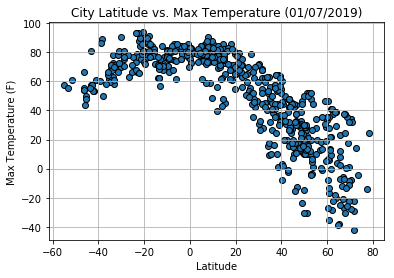

In [6]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (" + time.strftime("%m/%d/%Y", time.gmtime())+ ")")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/CityLatitudevsMaxTemperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

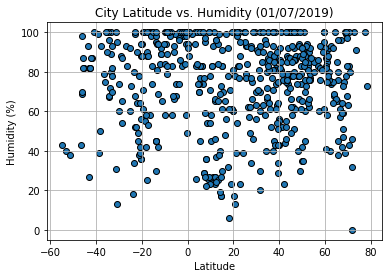

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (" + time.strftime("%m/%d/%Y", time.gmtime())+ ")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/CityLatitudevsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

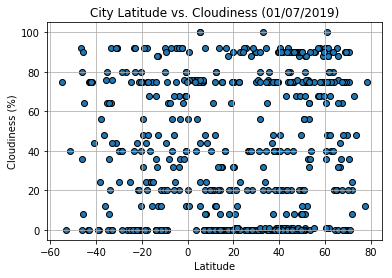

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (" + time.strftime("%m/%d/%Y", time.gmtime())+ ")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/CityLatitudevsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

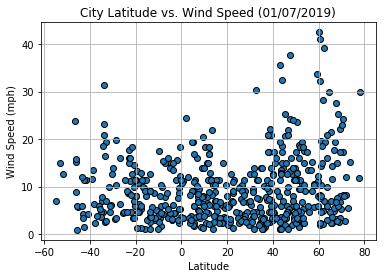

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (" + time.strftime("%m/%d/%Y", time.gmtime())+ ")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/CityLatitudevsWindSpeed.png")

# Show plot
plt.show()